# Sales Analysis: Monthly Sales Insights

## Project Overview
This project analyzes retail sales data to uncover monthly trends, revenue concentration across products and categories, regional performance differences, and sales growth patterns (MoM & YoY).

The objective is to translate raw transactional data into actionable business insights that support inventory planning, marketing strategy, and regional optimization decisions.

The notebook is Colab-ready and fully reproducible using the provided dataset or user-uploaded CSV files.



In [27]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set default style
sns.set_style("whitegrid")
%matplotlib inline


In [28]:
# Step 1 — Load Dataset
df = pd.read_csv("Superstore.csv")

# Quick preview
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [30]:
# Step 2 — Data Cleaning / Preprocessing
# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Drop rows with missing 'Sales' or 'Category'
df = df.dropna(subset=['Sales', 'Category'])

# Fill missing Postal Codes with placeholder (not used in analysis)
df['Postal Code'] = df['Postal Code'].fillna(0)


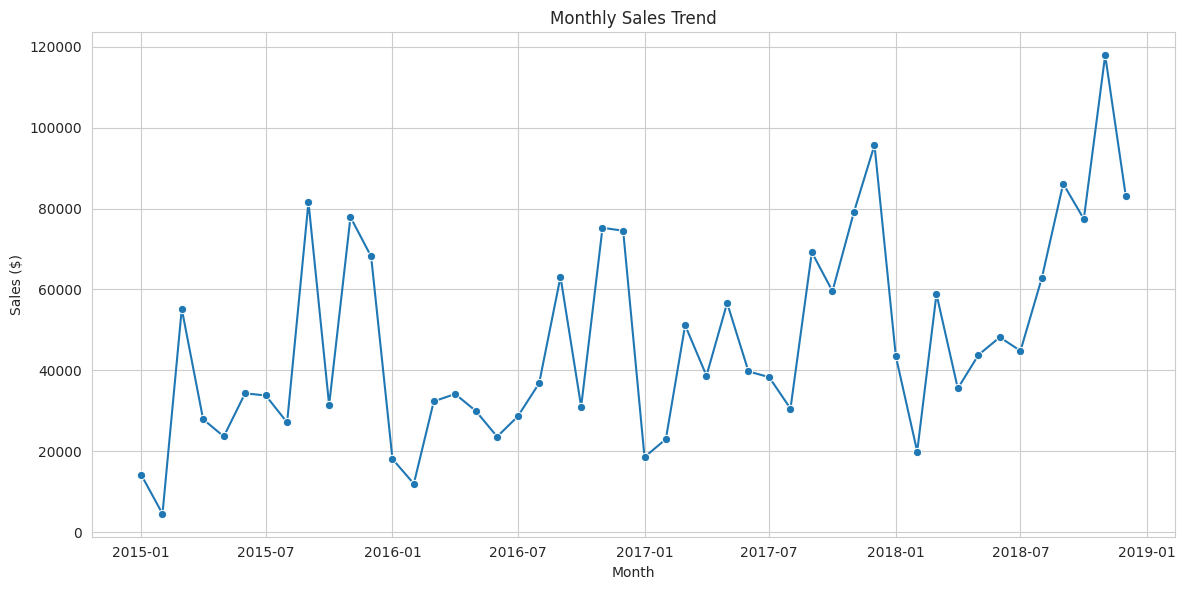

In [31]:
# Step 3 — Monthly Sales Aggregation
'''df['YearMonth'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Plot monthly sales trend
plt.figure(figsize=(12,6))
sns.lineplot(x='YearMonth', y='Sales', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()'''

# Step 3 — Monthly Sales Aggregation
df['YearMonth'] = df['Order Date'].dt.to_period('M')

monthly_sales = (
    df.groupby('YearMonth')['Sales']
      .sum()
      .reset_index()
)

# Convert Period to Timestamp for visualization
monthly_sales['YearMonth_dt'] = monthly_sales['YearMonth'].dt.to_timestamp()

# Plot monthly sales trend
plt.figure(figsize=(12,6))
sns.lineplot(
    x='YearMonth_dt',
    y='Sales',
    data=monthly_sales,
    marker='o'
)
plt.title("Monthly Sales Trend")
plt.ylabel("Sales ($)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()



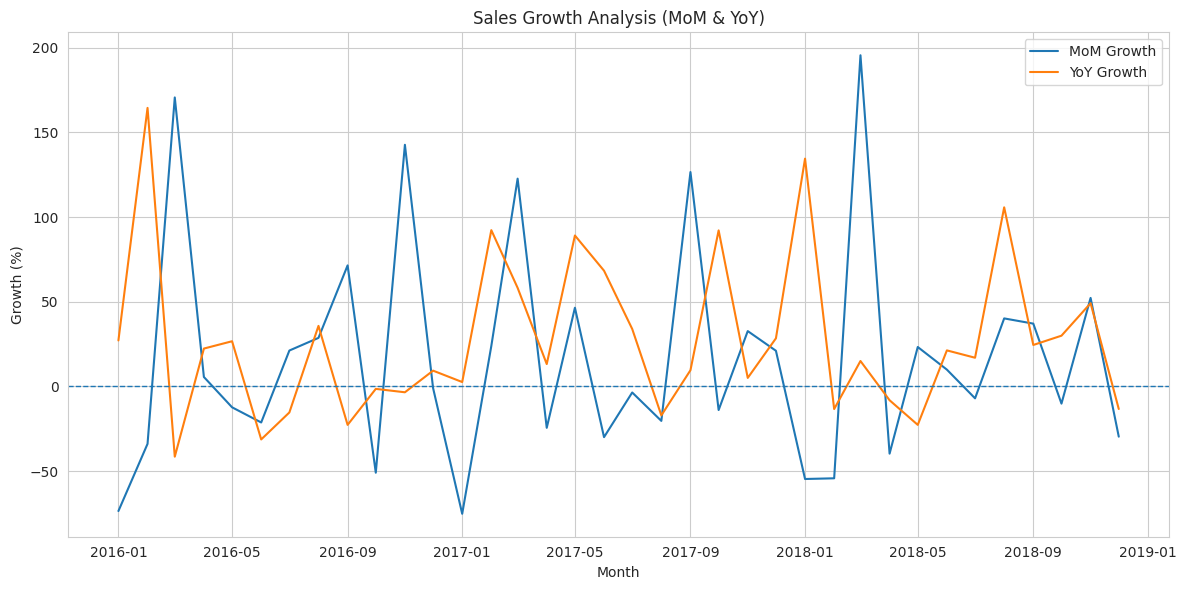

In [32]:
# Step 4 — Month-over-Month (MoM) and Year-over-Year (YoY) Growth

# 1. Ensure Sales column is numeric (defensive coding)
monthly_sales['Sales'] = pd.to_numeric(
    monthly_sales['Sales'], errors='coerce'
)

# 2. Calculate MoM growth
monthly_sales['Sales_prev_month'] = monthly_sales['Sales'].shift(1)
monthly_sales['MoM_Growth'] = (
    (monthly_sales['Sales'] - monthly_sales['Sales_prev_month'])
    / monthly_sales['Sales_prev_month'] * 100
)

# 3. Calculate YoY growth
monthly_sales['Sales_prev_year'] = monthly_sales['Sales'].shift(12)
monthly_sales['YoY_Growth'] = (
    (monthly_sales['Sales'] - monthly_sales['Sales_prev_year'])
    / monthly_sales['Sales_prev_year'] * 100
)

# 4. Keep NaN for periods where growth is not defined
# (first month for MoM, first 12 months for YoY)
# Do NOT fill NaN with 0 in the full dataframe

# 5. Prepare data for plotting (drop NaN only for visualization)
growth_plot_df = monthly_sales.dropna(
    subset=['MoM_Growth', 'YoY_Growth']
)

# 6. Plot MoM and YoY growth
plt.figure(figsize=(12, 6))

sns.lineplot(
    x='YearMonth_dt',
    y='MoM_Growth',
    data=growth_plot_df,
    label='MoM Growth'
)

sns.lineplot(
    x='YearMonth_dt',
    y='YoY_Growth',
    data=growth_plot_df,
    label='YoY Growth'
)

plt.axhline(0, linestyle='--', linewidth=1)
plt.title("Sales Growth Analysis (MoM & YoY)")
plt.xlabel("Month")
plt.ylabel("Growth (%)")
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-3202141022.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


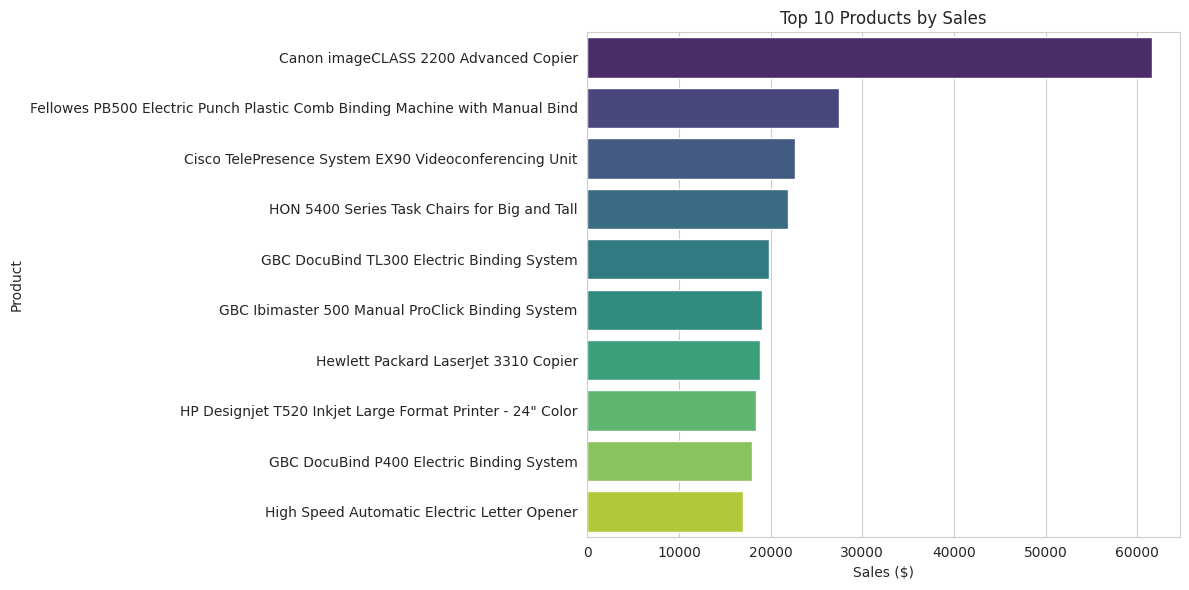

/tmp/ipython-input-3202141022.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='pastel')


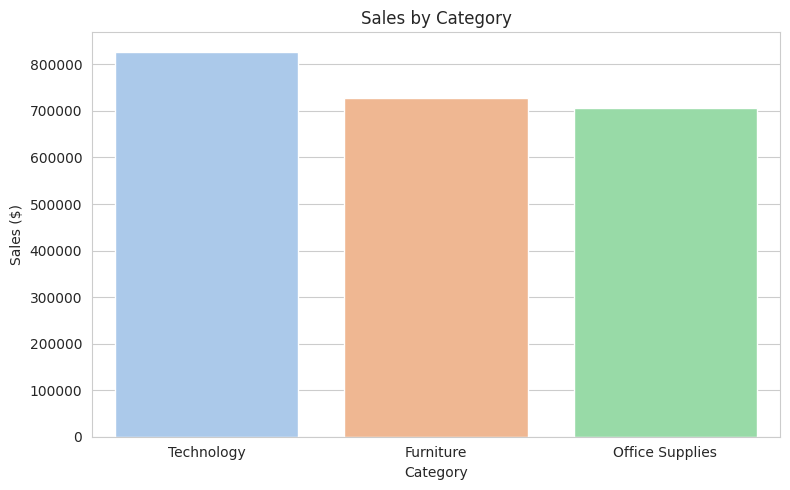

In [33]:
# Step 5 — Top Products and Categories
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Top 10 products
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

# Category sales
plt.figure(figsize=(8,5))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='pastel')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales ($)")
plt.tight_layout()
plt.show()


/tmp/ipython-input-662850388.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_region.index, y=sales_region.values, palette='coolwarm')


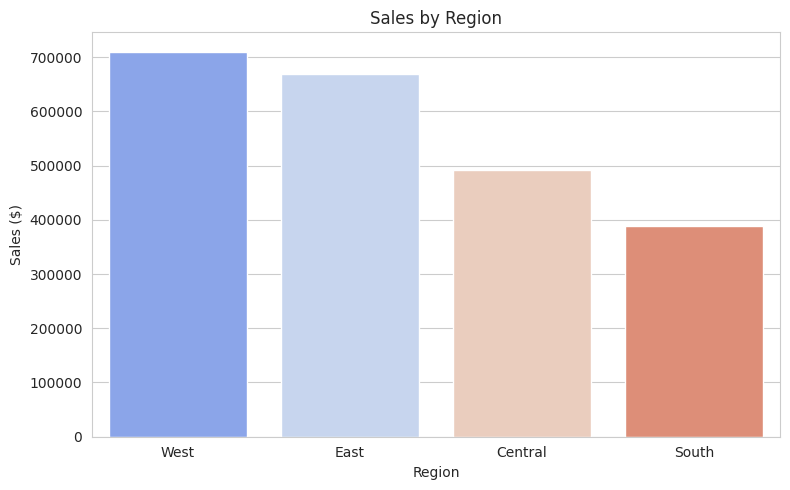

In [34]:
# Step 6 — Sales by Region
if 'Region' in df.columns:
    sales_region = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

    plt.figure(figsize=(8,5))
    sns.barplot(x=sales_region.index, y=sales_region.values, palette='coolwarm')
    plt.title("Sales by Region")
    plt.xlabel("Region")
    plt.ylabel("Sales ($)")
    plt.tight_layout()
    plt.show()


# Step 7 — Insights & Recommendations
### Key Insights
*Insights are derived from monthly trend analysis, MoM & YoY growth calculations, product-level revenue aggregation, and regional comparisons.*

- **Seasonality in Sales:** Monthly sales show clear seasonal patterns, with year-end months consistently higher than early-year periods.
- **Revenue Concentration:** Top products generate the majority of revenue, indicating a strong Pareto effect.
- **Underperforming Segments:** Certain categories and regions lag behind the overall performance.
- **Sustained Growth:** Both MoM and YoY growth metrics indicate positive business expansion over time.

### Recommendations
- **Focus on High-Impact Products:** Prioritize inventory and marketing for top-performing products.
- **Investigate Weak Segments:** Analyze underperforming categories and regions for potential strategy adjustments.
- **Leverage Seasonality:** Align promotions and inventory planning with seasonal demand patterns to maximize revenue.

